In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

stat2018 = pd.read_csv("match_stats_2018.csv")
stat2019 = pd.read_csv("match_stats_2019.csv")

In [40]:
stat2018 = stat2018.iloc[0:436]
stat2019 = stat2019.iloc[0:436]
partStat = pd.concat([stat2018, stat2019])
partStat = partStat.reset_index(drop=True)
partStat = partStat.dropna(how = 'any')
partStat['year'] = {}
for i in range(436):
    partStat.loc[i, 'year'] = 2018
for i in range(436):
    partStat.loc[i+436, 'year'] = 2019
partStat

C:\Users\volca\AppData\Local\Temp\ipykernel_21848\335428557.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['year'] = {}


,match_id,tourney_slug,match_stats_url_suffix,match_time,match_duration,winner_slug,winner_serve_rating,winner_aces,winner_double_faults,winner_first_serves_in,...,loser_break_points_converted,loser_break_points_return_total,loser_return_games_played,loser_service_points_won,loser_service_points_total,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,year
0,2018-339-MS001-7-1-ke17-h940,brisbane,/en/scores/2018/339/MS001/match-stats?isLive=F...,01:13:00,73.0,ke17,326.0,17.0,1.0,40.0,...,0.0,5.0,9.0,34.0,58.0,14.0,56.0,48.0,114.0,2018.0
1,2018-339-MS002-6-2-ke17-d875,brisbane,/en/scores/2018/339/MS002/match-stats?isLive=F...,01:33:00,93.0,ke17,310.0,19.0,2.0,50.0,...,1.0,2.0,13.0,48.0,74.0,20.0,72.0,68.0,146.0,2018.0
2,2018-339-MS003-6-1-h940-dh58,brisbane,/en/scores/2018/339/MS003/match-stats?isLive=F...,02:37:00,157.0,h940,274.0,14.0,5.0,70.0,...,3.0,6.0,16.0,65.0,94.0,42.0,115.0,107.0,209.0,2018.0
3,2018-339-MS004-5-4-d875-e831,brisbane,/en/scores/2018/339/MS004/match-stats?isLive=F...,02:25:00,145.0,d875,296.0,12.0,9.0,65.0,...,0.0,2.0,16.0,62.0,89.0,31.0,103.0,93.0,192.0,2018.0
4,2018-339-MS005-5-3-ke17-d801,brisbane,/en/scores/2018/339/MS005/match-stats?isLive=F...,01:31:00,91.0,ke17,289.0,18.0,5.0,43.0,...,2.0,3.0,13.0,49.0,75.0,20.0,69.0,69.0,144.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,2019-580-QS118-1-6-t840-m873,australian-open,/en/scores/2019/580/QS118/match-stats?isLive=F...,01:00:00,60.0,t840,316.0,4.0,1.0,39.0,...,0.0,1.0,9.0,30.0,50.0,13.0,51.0,43.0,101.0,2019.0
868,2019-580-QS110-1-5-v495-g983,australian-open,/en/scores/2019/580/QS110/match-stats?isLive=F...,01:17:00,77.0,v495,295.0,6.0,2.0,40.0,...,1.0,1.0,10.0,33.0,54.0,16.0,56.0,49.0,110.0,2019.0
869,2019-580-QS117-1-4-v717-ha28,australian-open,/en/scores/2019/580/QS117/match-stats?isLive=F...,01:31:00,91.0,v717,248.0,3.0,5.0,49.0,...,3.0,10.0,12.0,39.0,76.0,32.0,80.0,71.0,156.0,2019.0
870,2019-580-QS113-1-3-w503-bh87,australian-open,/en/scores/2019/580/QS113/match-stats?isLive=F...,01:17:00,77.0,w503,307.0,11.0,0.0,40.0,...,2.0,4.0,12.0,44.0,80.0,15.0,61.0,59.0,141.0,2019.0


In [41]:

partStat['w_avg_serve_rating'] = {}
partStat['l_avg_serve_rating'] = {}
#Helper Func
def last_avg(df, value, stat):
    #seperate rel columns
    col = df[['winner_slug', 'loser_slug']] 
    
    #find index and handle first game recorded case
    index = col[col==value].last_valid_index()
    if (index == None):
        return None
    if (df.loc[index, 'winner_slug'] == value):
        stat = 'w' + stat
        return df.loc[index, stat]
    else:
        stat = 'l' + stat
        return df.loc[index, stat]


C:\Users\volca\AppData\Local\Temp\ipykernel_21848\3447713544.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['w_avg_serve_rating'] = {}
C:\Users\volca\AppData\Local\Temp\ipykernel_21848\3447713544.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['l_avg_serve_rating'] = {}


In [42]:
for i in range(partStat.shape[0]):
     
    w_slug = partStat.at[i, 'winner_slug']
    l_slug = partStat.at[i, 'loser_slug']
    temp_df = partStat.iloc[0:i]
    
    #num of games played before
    w_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(w_slug).sum() 
    l_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(l_slug).sum() 
    
    #previous avg
    w_prev_avg = last_avg(temp_df, w_slug, '_avg_serve_rating')
    if (w_prev_avg == None):
        w_prev_avg = partStat.loc[i, 'winner_serve_rating']
    l_prev_avg = last_avg(temp_df, l_slug, "_avg_serve_rating")
    if (l_prev_avg == None):
        l_prev_avg = partStat.loc[i,'loser_serve_rating']
    
    #new avg
        w_new_avg = ((w_prev_avg * float(w_games)) + partStat.loc[i, 'winner_serve_rating'])/(w_games+1)
        l_new_avg = ((l_prev_avg * float(l_games)) + partStat.loc[i, 'loser_serve_rating'])/(l_games+1)
    
        
    #aplugging into
    partStat.loc[i, 'w_avg_serve_rating'] = w_new_avg
    partStat.loc[i, 'l_avg_serve_rating'] = l_new_avg


In [43]:
partStat['w_avg_first_serve_%'] = {}
partStat['l_avg_first_serve_%'] = {}
for i in range(partStat.shape[0]):
     
    w_slug = partStat.at[i, 'winner_slug']
    l_slug = partStat.at[i, 'loser_slug']
    temp_df = partStat.iloc[0:i]
    
    #num of games played before
    w_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(w_slug).sum() 
    l_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(l_slug).sum() 
    
    #previous avg
    w_prev_avg = last_avg(temp_df, w_slug, '_avg_first_serve_%')
    if (w_prev_avg == None): 
        w_prev_avg = (partStat.loc[i, 'winner_first_serves_in'])/(partStat.loc[i, 'winner_first_serves_total'])
    l_prev_avg = last_avg(temp_df, l_slug, '_avg_first_serve_%')
    if (l_prev_avg == None):
        l_prev_avg = (partStat.loc[i, 'loser_first_serves_in'])/(partStat.loc[i, 'loser_first_serves_total'])
    
    #new avg
        w_new_avg = ((w_prev_avg * float(w_games)) + (partStat.loc[i, 'winner_first_serves_in']/partStat.loc[i, 'winner_first_serves_total']))/(float(w_games+1))
        l_new_avg = ((l_prev_avg * float(l_games)) + (partStat.loc[i, 'loser_first_serves_in']/partStat.loc[i, 'loser_first_serves_total']))/(float(l_games+1))
    
        
    #aplugging into
    partStat.loc[i, 'w_avg_first_serve_%'] = w_new_avg
    partStat.loc[i, 'l_avg_first_serve_%'] = l_new_avg

C:\Users\volca\AppData\Local\Temp\ipykernel_21848\1258704834.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['w_avg_first_serve_%'] = {}
C:\Users\volca\AppData\Local\Temp\ipykernel_21848\1258704834.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['l_avg_first_serve_%'] = {}


In [44]:
partStat['w_avg_first_serve_won_%'] = {}
partStat['l_avg_first_serve_won_%'] = {}
for i in range(partStat.shape[0]):
     
    w_slug = partStat.at[i, 'winner_slug']
    l_slug = partStat.at[i, 'loser_slug']
    temp_df = partStat.iloc[0:i]
    
    #num of games played before
    w_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(w_slug).sum() 
    l_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(l_slug).sum() 
    
    #previous avg
    w_prev_avg = last_avg(temp_df, w_slug, '_avg_first_serve_won_%')
    if (w_prev_avg == None): 
        w_prev_avg = (partStat.loc[i, 'winner_first_serve_points_won'])/(partStat.loc[i, 'winner_first_serves_in'])
    l_prev_avg = last_avg(temp_df, l_slug, '_avg_first_serve_won_%')
    if (l_prev_avg == None):
        l_prev_avg = (partStat.loc[i, 'loser_first_serve_points_won'])/(partStat.loc[i, 'loser_first_serves_in'])
    
    #new avg
        w_new_avg = ((w_prev_avg * float(w_games)) + (partStat.loc[i, 'winner_first_serve_points_won']/partStat.loc[i, 'winner_first_serves_in']))/(float(w_games+1))
        l_new_avg = ((l_prev_avg * float(l_games)) + (partStat.loc[i, 'loser_first_serve_points_won']/partStat.loc[i, 'loser_first_serves_in']))/(float(l_games+1))
    
        
    #aplugging into
    partStat.loc[i, 'w_avg_first_serve_won_%'] = w_new_avg
    partStat.loc[i, 'l_avg_first_serve_won_%'] = l_new_avg

C:\Users\volca\AppData\Local\Temp\ipykernel_21848\2229566108.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['w_avg_first_serve_won_%'] = {}
C:\Users\volca\AppData\Local\Temp\ipykernel_21848\2229566108.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['l_avg_first_serve_won_%'] = {}


In [45]:
partStat['w_avg_second_serve_won_%'] = {}
partStat['l_avg_second_serve_won_%'] = {}
for i in range(partStat.shape[0]):
     
    w_slug = partStat.at[i, 'winner_slug']
    l_slug = partStat.at[i, 'loser_slug']
    temp_df = partStat.iloc[0:i]
    
    #num of games played before
    w_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(w_slug).sum() 
    l_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(l_slug).sum() 
    
    #previous avg
    w_prev_avg = last_avg(temp_df, w_slug, '_avg_second_serve_won_%')
    if (w_prev_avg == None): 
        w_prev_avg = (partStat.loc[i, 'winner_second_serve_points_won'])/(partStat.loc[i, 'winner_second_serve_points_total'])
    l_prev_avg = last_avg(temp_df, l_slug, '_avg_second_serve_won_%')
    if (l_prev_avg == None):
        l_prev_avg = (partStat.loc[i, 'loser_second_serve_points_won'])/(partStat.loc[i, 'loser_second_serve_points_total'])
    
    #new avg
        w_new_avg = ((w_prev_avg * float(w_games)) + (partStat.loc[i, 'winner_second_serve_points_won']/partStat.loc[i, 'winner_second_serve_points_total']))/(float(w_games+1))
        l_new_avg = ((l_prev_avg * float(l_games)) + (partStat.loc[i, 'loser_second_serve_points_won']/partStat.loc[i, 'loser_second_serve_points_total']))/(float(l_games+1))
    
        
    #aplugging into
    partStat.loc[i, 'w_avg_second_serve_won_%'] = w_new_avg
    partStat.loc[i, 'l_avg_second_serve_won_%'] = l_new_avg

C:\Users\volca\AppData\Local\Temp\ipykernel_21848\1940566188.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['w_avg_second_serve_won_%'] = {}
C:\Users\volca\AppData\Local\Temp\ipykernel_21848\1940566188.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['l_avg_second_serve_won_%'] = {}


In [46]:
partStat['w_avg_break_points_serve_%'] = {}
partStat['l_avg_break_points_serve_%'] = {}
for i in range(partStat.shape[0]):
     
    count = True
    w_slug = partStat.at[i, 'winner_slug']
    l_slug = partStat.at[i, 'loser_slug']
    temp_df = partStat.iloc[0:i]
    
    if (partStat.loc[i, 'winner_break_points_serve_total'] == 0 and partStat.loc[i, 'loser_break_points_serve_total'] == 0):
        count = False
    elif(partStat.loc[i, 'loser_break_points_serve_total'] == 0):
        
        #num of games played before
        w_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(w_slug).sum()
        
        #previous avg
        w_prev_avg = last_avg(temp_df, w_slug, '_avg_break_points_serve_%')
        if (w_prev_avg == None): 
            w_prev_avg = (partStat.loc[i, 'winner_break_points_saved'])/(partStat.loc[i, 'winner_break_points_serve_total']) 
            
        #new avg
        w_new_avg = ((w_prev_avg * float(w_games)) + (partStat.loc[i, 'winner_break_points_saved'])/(partStat.loc[i, 'winner_break_points_serve_total']))/(float(w_games+1))    
            
        
    elif(partStat.loc[i, 'winner_break_points_serve_total'] == 0):
        
         #num of games played before
        l_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(l_slug).sum() 
        
        #previous avg
        l_prev_avg = last_avg(temp_df, l_slug, '_avg_break_points_serve_%')
        if (l_prev_avg == None):
            l_prev_avg = (partStat.loc[i, 'loser_break_points_saved'])/(partStat.loc[i, 'loser_break_points_serve_total'])
            
        #new avg
        l_new_avg = ((l_prev_avg * float(l_games)) + (partStat.loc[i, 'loser_break_points_saved'])/(partStat.loc[i, 'loser_break_points_serve_total']))/(float(l_games+1))
    
    else: 
        #num of games played before
        w_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(w_slug).sum() 
        l_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(l_slug).sum() 
    
        #previous avg
        w_prev_avg = last_avg(temp_df, w_slug, '_avg_break_points_serve_%')
        if (w_prev_avg == None): 
            w_prev_avg = (partStat.loc[i, 'winner_break_points_saved'])/(partStat.loc[i, 'winner_break_points_serve_total'])
        l_prev_avg = last_avg(temp_df, l_slug, '_avg_break_points_serve_%')
        if (l_prev_avg == None):
            l_prev_avg = (partStat.loc[i, 'loser_break_points_saved'])/(partStat.loc[i, 'loser_break_points_serve_total'])
    
        #new avg
            w_new_avg = ((w_prev_avg * float(w_games)) + (partStat.loc[i, 'winner_break_points_saved'])/(partStat.loc[i, 'winner_break_points_serve_total']))/(float(w_games+1))
            l_new_avg = ((l_prev_avg * float(l_games)) + (partStat.loc[i, 'loser_break_points_saved'])/(partStat.loc[i, 'loser_break_points_serve_total']))/(float(l_games+1))
    
        
    #plugging into
    if (count):
        partStat.loc[i, 'w_avg_break_points_serve_%'] = w_new_avg
        partStat.loc[i, 'l_avg_break_points_serve_%'] = l_new_avg

C:\Users\volca\AppData\Local\Temp\ipykernel_21848\1831947334.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['w_avg_break_points_serve_%'] = {}
C:\Users\volca\AppData\Local\Temp\ipykernel_21848\1831947334.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['l_avg_break_points_serve_%'] = {}


In [47]:
partStat['w_avg_return_rating'] = {}
partStat['l_avg_return_rating'] = {}
for i in range(partStat.shape[0]):
     
    w_slug = partStat.at[i, 'winner_slug']
    l_slug = partStat.at[i, 'loser_slug']
    temp_df = partStat.iloc[0:i]
    
    #num of games played before
    w_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(w_slug).sum() 
    l_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(l_slug).sum() 
    
    #previous avg
    w_prev_avg = last_avg(temp_df, w_slug, '_avg_return_rating')
    if (w_prev_avg == None):
        w_prev_avg = partStat.loc[i, 'winner_return_rating']
    l_prev_avg = last_avg(temp_df, l_slug, "_avg_return_rating")
    if (l_prev_avg == None):
        l_prev_avg = partStat.loc[i,'loser_return_rating']
    
    #new avg
        w_new_avg = ((w_prev_avg * float(w_games)) + partStat.loc[i, 'winner_return_rating'])/(w_games+1)
        l_new_avg = ((l_prev_avg * float(l_games)) + partStat.loc[i, 'loser_return_rating'])/(l_games+1)
    
        
    #aplugging into
    partStat.loc[i, 'w_avg_return_rating'] = w_new_avg
    partStat.loc[i, 'l_avg_return_rating'] = l_new_avg

C:\Users\volca\AppData\Local\Temp\ipykernel_21848\3064477614.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['w_avg_return_rating'] = {}
C:\Users\volca\AppData\Local\Temp\ipykernel_21848\3064477614.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['l_avg_return_rating'] = {}


In [48]:
partStat['w_avg_first_return_won_%'] = {}
partStat['l_avg_first_return_won_%'] = {}
for i in range(partStat.shape[0]):
     
    w_slug = partStat.at[i, 'winner_slug']
    l_slug = partStat.at[i, 'loser_slug']
    temp_df = partStat.iloc[0:i]
    
    #num of games played before
    w_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(w_slug).sum() 
    l_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(l_slug).sum() 
    
    #previous avg
    w_prev_avg = last_avg(temp_df, w_slug, '_avg_first_return_won_%')
    if (w_prev_avg == None): 
        w_prev_avg = (partStat.loc[i, 'winner_first_serve_return_won'])/(partStat.loc[i, 'winner_first_serve_return_total'])
    l_prev_avg = last_avg(temp_df, l_slug, '_avg_first_return_won_%')
    if (l_prev_avg == None):
        l_prev_avg = (partStat.loc[i, 'loser_first_serve_return_won'])/(partStat.loc[i, 'loser_first_serve_return_total'])
    
    #new avg
        w_new_avg = ((w_prev_avg * float(w_games)) + (partStat.loc[i, 'winner_first_serve_return_won']/partStat.loc[i, 'winner_first_serve_return_total']))/(float(w_games+1))
        l_new_avg = ((l_prev_avg * float(l_games)) + (partStat.loc[i, 'loser_first_serve_return_won']/partStat.loc[i, 'loser_first_serve_return_total']))/(float(l_games+1))
    
        
    #aplugging into
    partStat.loc[i, 'w_avg_first_return_won_%'] = w_new_avg
    partStat.loc[i, 'l_avg_first_return_won_%'] = l_new_avg

C:\Users\volca\AppData\Local\Temp\ipykernel_21848\113181648.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['w_avg_first_return_won_%'] = {}
C:\Users\volca\AppData\Local\Temp\ipykernel_21848\113181648.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['l_avg_first_return_won_%'] = {}


In [49]:
partStat['w_avg_second_return_won_%'] = {}
partStat['l_avg_second_return_won_%'] = {}
for i in range(partStat.shape[0]):
     
    w_slug = partStat.at[i, 'winner_slug']
    l_slug = partStat.at[i, 'loser_slug']
    temp_df = partStat.iloc[0:i]
    
    #num of games played before
    w_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(w_slug).sum() 
    l_games = (temp_df['winner_slug'] + ' ' + temp_df['loser_slug']).str.count(l_slug).sum() 
    
    #previous avg
    w_prev_avg = last_avg(temp_df, w_slug, '_avg_second_return_won_%')
    if (w_prev_avg == None): 
        w_prev_avg = (partStat.loc[i, 'winner_second_serve_return_won'])/(partStat.loc[i, 'winner_second_serve_return_total'])
    l_prev_avg = last_avg(temp_df, l_slug, '_avg_second_return_won_%')
    if (l_prev_avg == None):
        l_prev_avg = (partStat.loc[i, 'loser_second_serve_return_won'])/(partStat.loc[i, 'loser_second_serve_return_total'])
    
    #new avg
        w_new_avg = ((w_prev_avg * float(w_games)) + (partStat.loc[i, 'winner_second_serve_return_won']/partStat.loc[i, 'winner_second_serve_return_total']))/(float(w_games+1))
        l_new_avg = ((l_prev_avg * float(l_games)) + (partStat.loc[i, 'loser_second_serve_return_won']/partStat.loc[i, 'loser_second_serve_return_total']))/(float(l_games+1))
    
        
    #aplugging into
    partStat.loc[i, 'w_avg_second_return_won_%'] = w_new_avg
    partStat.loc[i, 'l_avg_second_return_won_%'] = l_new_avg

C:\Users\volca\AppData\Local\Temp\ipykernel_21848\175643600.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['w_avg_second_return_won_%'] = {}
C:\Users\volca\AppData\Local\Temp\ipykernel_21848\175643600.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  partStat['l_avg_second_return_won_%'] = {}


(100.0, 400.0)

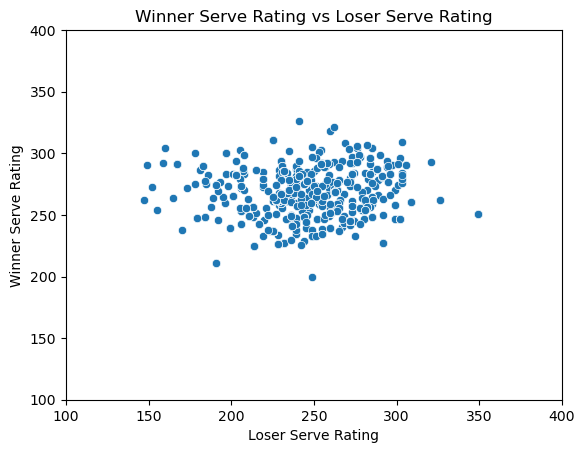

In [50]:
graph = sns.scatterplot(x= partStat["l_avg_serve_rating"], y = partStat["w_avg_serve_rating"])
graph.set(xlabel = "Loser Serve Rating", ylabel = "Winner Serve Rating", title = "Winner Serve Rating vs Loser Serve Rating")
plt.ylim(100, 400)
plt.xlim(100, 400)

(0.0, 1.0)

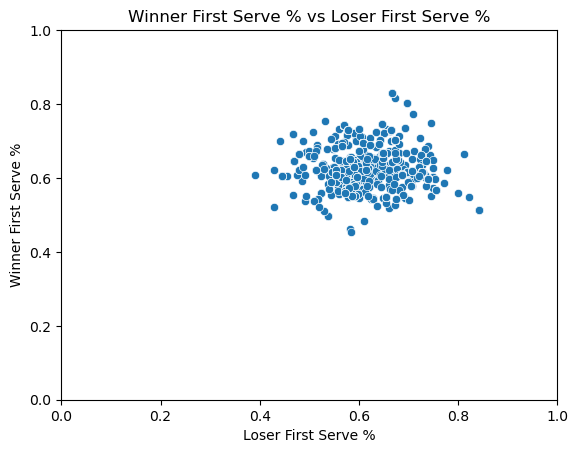

In [51]:
graph = sns.scatterplot(x= partStat["l_avg_first_serve_%"], y = partStat["w_avg_first_serve_%"])
graph.set(xlabel = "Loser First Serve %", ylabel = "Winner First Serve %", title = "Winner First Serve % vs Loser First Serve %")
plt.ylim(0,1)
plt.xlim(0,1)

In [52]:
sum_total = 0.0
for x in partStat['w_avg_first_serve_%']:
    sum_total = sum_total + x
    
w_first_perc = (sum_total)/(float(partStat.shape[0]))
sum_total = 0
for x in partStat['l_avg_first_serve_%']:
    sum_total = sum_total  + x
l_first_perc = (sum_total)/(float(partStat.shape[0]))
print('Winner First Serve Percentage vs Loser First Serve Percentage')
print(w_first_perc,  'vs'  ,l_first_perc)

Winner First Serve Percentage vs Loser First Serve Percentage
0.6373125249096834 vs 0.6260174703110946


(0.0, 300.0)

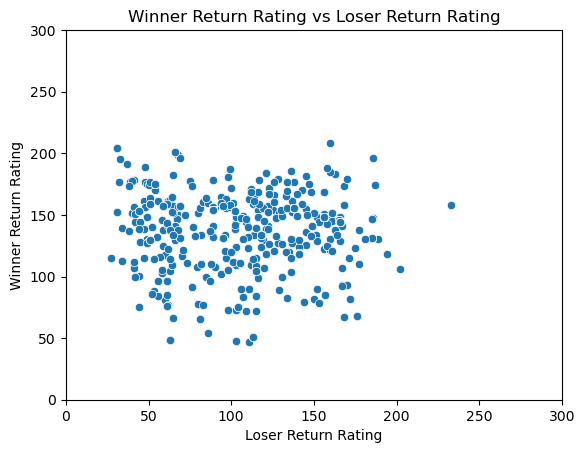

In [53]:
graph = sns.scatterplot(x= partStat["l_avg_return_rating"], y = partStat["w_avg_return_rating"])
graph.set(xlabel = "Loser Return Rating", ylabel = "Winner Return Rating", title = "Winner Return Rating vs Loser Return Rating")
plt.ylim(0, 300)
plt.xlim(0, 300)

(0.0, 1.0)

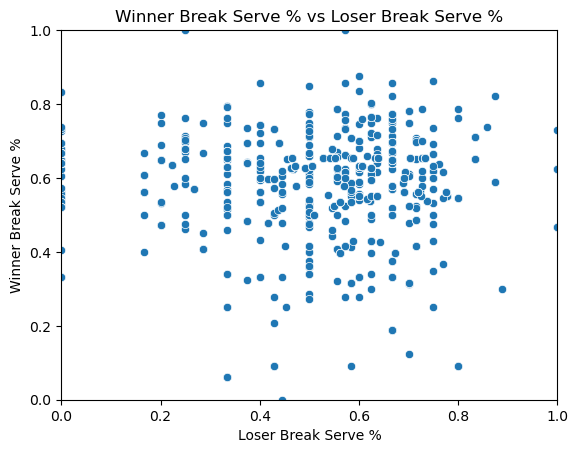

In [54]:
graph = sns.scatterplot(x= partStat['l_avg_break_points_serve_%'], y = partStat['w_avg_break_points_serve_%'])
graph.set(xlabel = "Loser Break Serve %", ylabel = "Winner Break Serve %", title = "Winner Break Serve % vs Loser Break Serve %")
plt.ylim(0,1)
plt.xlim(0,1)

In [55]:
sum_total = 0.0
for x in partStat['w_avg_break_points_serve_%']:
    sum_total = sum_total + x
    
w_break_perc = (sum_total)/(float(partStat.shape[0]))
sum_total = 0
for x in partStat['l_avg_break_points_serve_%']:
    sum_total = sum_total  + x
l_break_perc = (sum_total)/(float(partStat.shape[0]))
print('Winner Break Saved Percentage vs Loser Break Saved Percentage')
print(w_break_perc,  'vs'  ,l_break_perc)

Winner Break Saved Percentage vs Loser Break Saved Percentage
0.5830840307012501 vs 0.5251278383093276


(0.0, 1.0)

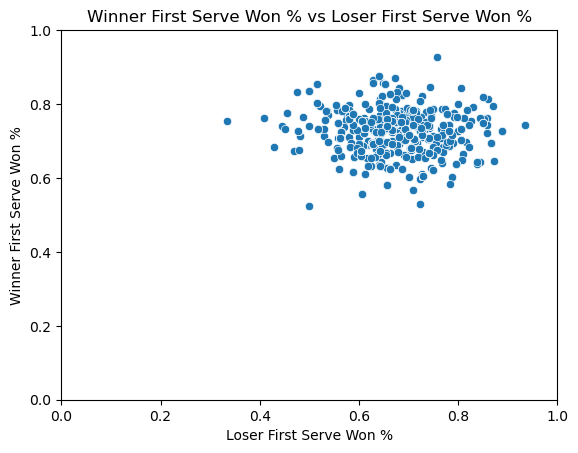

In [56]:
graph = sns.scatterplot(x= partStat["l_avg_first_serve_won_%"], y = partStat["w_avg_first_serve_won_%"])
graph.set(xlabel = "Loser First Serve Won %", ylabel = "Winner First Serve Won %", title = "Winner First Serve Won % vs Loser First Serve Won %")
plt.ylim(0,1)
plt.xlim(0,1)

(0.0, 1.0)

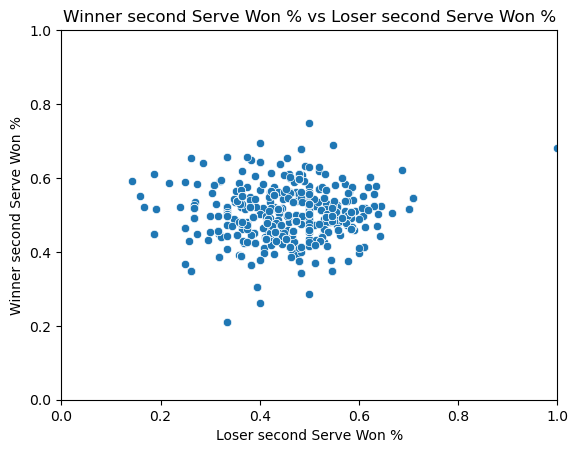

In [57]:
graph = sns.scatterplot(x= partStat["l_avg_second_serve_won_%"], y = partStat["w_avg_second_serve_won_%"])
graph.set(xlabel = "Loser second Serve Won %", ylabel = "Winner second Serve Won %", title = "Winner second Serve Won % vs Loser second Serve Won %")
plt.ylim(0,1)
plt.xlim(0,1)

(0.0, 1.0)

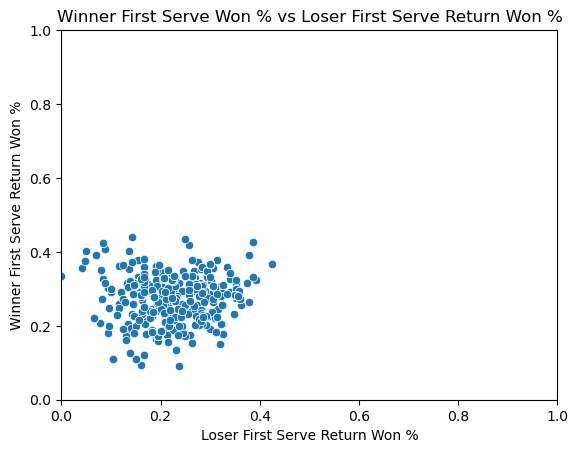

In [58]:
graph = sns.scatterplot(x= partStat["l_avg_first_return_won_%"], y = partStat["w_avg_first_return_won_%"])
graph.set(xlabel = "Loser First Serve Return Won %", ylabel = "Winner First Serve Return Won %", title = "Winner First Serve Won % vs Loser First Serve Return Won %")
plt.ylim(0,1)
plt.xlim(0,1)

(0.0, 1.0)

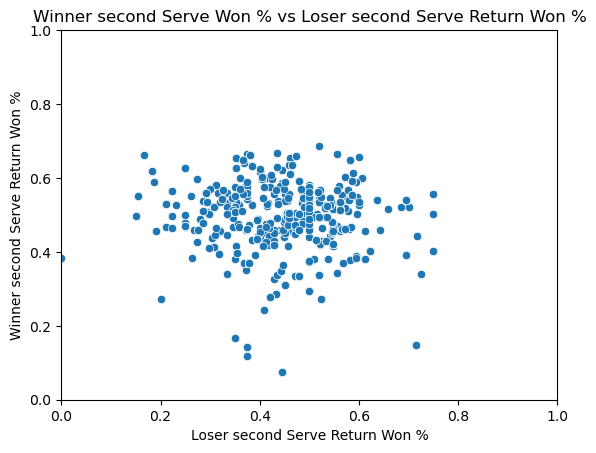

In [59]:
graph = sns.scatterplot(x= partStat["l_avg_second_return_won_%"], y = partStat["w_avg_second_return_won_%"])
graph.set(xlabel = "Loser second Serve Return Won %", ylabel = "Winner second Serve Return Won %", title = "Winner second Serve Won % vs Loser second Serve Return Won %")
plt.ylim(0,1)
plt.xlim(0,1)

In [60]:
partStat.to_csv('data_to_use.csv', index = False)